In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix

### Data Source
- Breast Cancer Wisconsin (Diagnostic) Data Set
- Predict whether the cancer is benign or malignant
- https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

### Read Data

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
#df.info()

In [5]:
#remove patient ID, blank column...
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [6]:
#df.info()

### Separate Features (X) and Target (y)

In [7]:
# Separate features (X) and target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [8]:
X.shape

(569, 30)

The dataset isn't considered high-dimensional when the number of features is much lower than the number of samples.

In [9]:
y.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

The dataset is slightly imbalanced.

Overall, the dataset is clean and ready to test ML models.

### Find the Best Models and Validate
#### 1. Random Forest

In [10]:
# Initialize Random Forest model with up to 100 trees
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Configure k-fold cross-validation (e.g., 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [11]:
# Generate predictions using k-fold validation
y_pred = cross_val_predict(model, X, y, cv=kf)

# Calculate and print confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix (Aggregated Across K-Folds):\n", cm)

# Optional: Print additional metrics (precision, recall, accuracy)
tn, fp, fn, tp = cm.ravel()
print(f"Accuracy: {(tp + tn) / (tp + tn + fp + fn):.2f}")
print(f"Precision: {tp / (tp + fp):.2f}")
print(f"Recall: {tp / (tp + fn):.2f}")

Confusion Matrix (Aggregated Across K-Folds):
 [[347  10]
 [ 13 199]]
Accuracy: 0.96
Precision: 0.95
Recall: 0.94


#### 2. Other ML Methods

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [13]:
# Standardize features (important for SVM and kNN that rely on distance-based calculations)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
models = {
    #"SVM": SVC(kernel='linear', random_state=42), # Accuracy: 0.97, Precision: 0.97, Recall: 0.96
    #"SVM": SVC(kernel='linear', C=0.1, gamma=0.001, random_state=42), # Accuracy: 0.98, Precision: 0.99, Recall: 0.95
    "SVM": SVC(kernel='rbf', random_state=42), # Accuracy: 0.98, Precision: 0.98, Recall: 0.96
    #"SVM": SVC(kernel='rbf', C=10, gamma=0.01, random_state=42), # Accuracy: 0.98, Precision: 1.00, Recall: 0.95
    "LDA": LinearDiscriminantAnalysis(),
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "LR": LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
    #"RF": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [15]:
# Train and evaluate each model
for name, model in models.items():
    y_pred = cross_val_predict(model, X, y, cv=kf)
    cm = confusion_matrix(y, y_pred)
    
    print(f"\nConfusion Matrix for {name}:\n", cm)

    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")


Confusion Matrix for SVM:
 [[353   4]
 [  8 204]]
Accuracy: 0.98
Precision: 0.98
Recall: 0.96

Confusion Matrix for LDA:
 [[355   2]
 [ 24 188]]
Accuracy: 0.95
Precision: 0.99
Recall: 0.89

Confusion Matrix for kNN:
 [[353   4]
 [ 19 193]]
Accuracy: 0.96
Precision: 0.98
Recall: 0.91

Confusion Matrix for LR:
 [[352   5]
 [  8 204]]
Accuracy: 0.98
Precision: 0.98
Recall: 0.96


In [16]:
# #Hyperparameter Tuning: to find the optimal parameters for SVM model.
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto'],
# }

# grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=5)
# grid_search.fit(X, y)

# print("Best Parameters:", grid_search.best_params_)

### Principal Component Analysis (PCA) 
To check if the two groups seperate well.

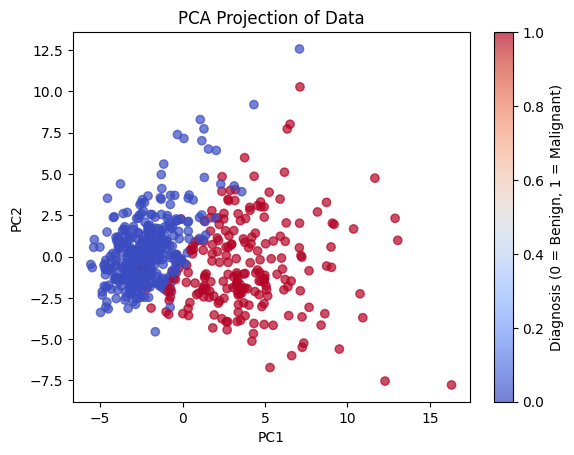

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Convert labels to numeric
le = LabelEncoder()
y_numeric = le.fit_transform(y)  # 'M' -> 1, 'B' -> 0

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA projection
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='coolwarm', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection of Data")
plt.colorbar(label="Diagnosis (0 = Benign, 1 = Malignant)")
plt.show()

The two classes (M and B) are almost linearly separable with slight overlap or noise in the first two PCs, suggesting the data is not perfectly linearly separable.

In [18]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(15, 5))
# sns.boxplot(data=df.iloc[:, 1:])
# plt.xticks(rotation=60)
# plt.show()

In [19]:
# plt.figure(figsize=(15, 5))
# sns.boxplot(data=X)
# plt.xticks(rotation=60)
# plt.show()